<a href="https://colab.research.google.com/github/komalagnihotri18/SHALA_Assgn/blob/master/Assignment4_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
print(df.shape)
df.head(5)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
print(df.Target.max())
print(df.Target.min())

5.00001
0.14999


In [0]:
df = df[df.Target < 4.9]
df.shape

(19608, 9)

In [0]:
X = df.MedInc
y = df.Target

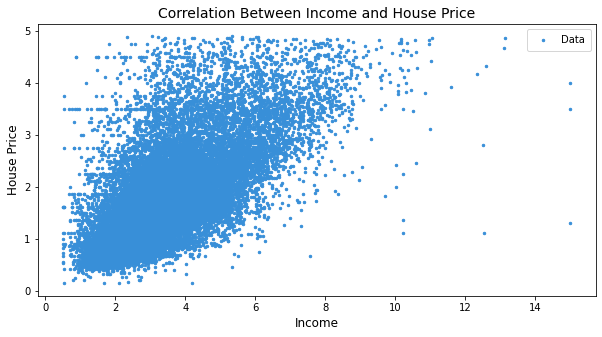

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):

  ################################################
  m,b = 0.1,0.1
  mse=[]
  X=np.array(X)
  y=np.array(y)
  for i in range(epochs):
    x1=X[i]
    y1=y[i]
    e=y1-(m*x1+b)
    m = m - (-lr*(np.dot(e,x1))/batch_size)
    b = b - ((-lr*e)/batch_size)
    mse.append(mean_squared_error(y, m*X+b))
  #################################################       
    
  return m, b, mse
  

In [0]:
m, b, mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)
print(m)
print(b)
print(mse)

0.5101700278047506
0.24681078891255534
[1.368693832914392, 0.9968691997492994, 0.7960202982133304, 0.6690408874073978, 0.5915255443892967, 0.5689975704342952, 0.5552458161743586, 0.5556124734461872, 0.5613038024286006, 0.572385819196925, 0.596841782841685, 0.6145054246792345, 0.6262511322111366, 0.6364936797238125, 0.6462583580522717, 0.6484300767612966, 0.6429847636475835, 0.6496885500628325, 0.658937638702031, 0.6601852123314714, 0.6717890253023255, 0.684674435442112, 0.6846745437421883, 0.6714318445529487, 0.6608366543390418, 0.6471117834756642, 0.629515510172316, 0.6276369523741201, 0.6284020721229935, 0.6335395219062957, 0.6339086266765274, 0.6320983091826853, 0.6313602348996092, 0.6337776396989842, 0.6168941445180143, 0.6170988643987244, 0.6209182982570913, 0.6228518892844925, 0.6189591925099062, 0.6253474514686703, 0.631994502214615, 0.6429087010590304, 0.6496752503696485, 0.6286171406379801, 0.6309109968394035, 0.6380755766576234, 0.6422145046322238, 0.6483065363902017, 0.66578

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE:  0.6144688367300208


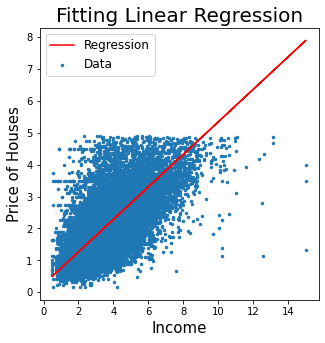

In [0]:
y_pred = m*X + b

################################################
###########write your code#####################
###############################################
print('MSE: ',mean_squared_error(y,y_pred))
plt.figure(figsize=(5,5))
plt.scatter(X,y,label='Data',s=6)
plt.plot(X,y_pred,color='red',label='Regression')
plt.legend(fontsize=12,frameon=True)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Price of Houses',fontsize=15)
plt.title('Fitting Linear Regression',fontsize=20)
plt.show()

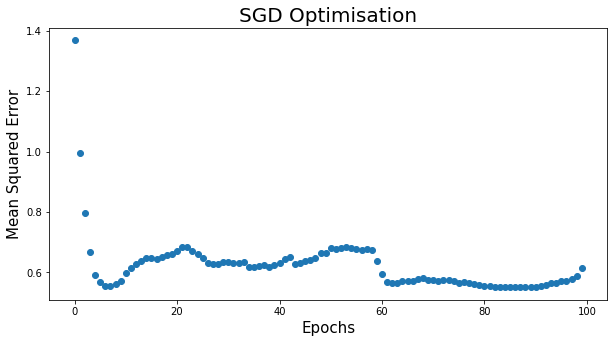

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(mse)),mse)
plt.title('SGD Optimisation',fontsize=20)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.show()